This program displays the anomalous December temperatures
for the NE United States from 2008 through 2019


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
# import geopandas as gpd

In [2]:
path='/shared/obs/gridded/GHCN_CAMS/'
file='air.mon.mean.nc'

In [3]:
ds=xr.open_dataset(path+file)
ds
proj=ccrs.PlateCarree()


In [4]:
#  REVERSE OUR Latitudes
ds = ds.reindex(lat=list(reversed(ds['lat'])))

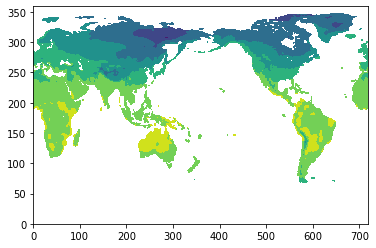

In [5]:
#  PLOT our data
plt.contourf(ds['air'][0,:,:])

In [6]:
# Shift longitudes to run from -180 to +180
ds=ds.assign_coords(lon=(((ds['lon']+180) % 360))-180)
ds=ds.sortby(ds['lon'])
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 867)
Coordinates:
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-03-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html

In [7]:
# Select region and contour plot to check its range.

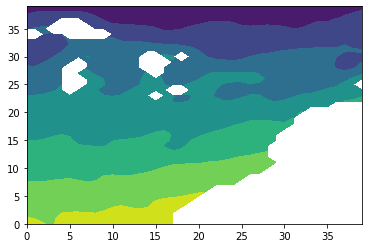

In [8]:
ds_region=ds.sel(lon=slice(-90,-70),lat=slice(30,50))
ds_region
plt.contourf(ds_region['air'][0,:,:])

In [9]:
# Select time of investigation from January, 2009 through December, 2019 = 11 years, giving 132 time points.
ds_region=ds_region.sel(time=slice('2008-01-01', '2019-12-01'))
ds_region



<xarray.Dataset>
Dimensions:  (lat: 40, lon: 40, time: 144)
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 48.25 48.75 49.25 49.75
  * lon      (lon) float32 -89.75 -89.25 -88.75 -88.25 ... -71.25 -70.75 -70.25
  * time     (time) datetime64[ns] 2008-01-01 2008-02-01 ... 2019-12-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html

In [10]:
# Find mean air temperature .
ds_regionm=ds_region.groupby('time.month').mean(dim='time')
ds_regionm




<xarray.Dataset>
Dimensions:  (lat: 40, lon: 40, month: 12)
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 48.25 48.75 49.25 49.75
  * lon      (lon) float32 -89.75 -89.25 -88.75 -88.25 ... -71.25 -70.75 -70.25
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float32 284.68335 284.1683 ... 262.38 262.6975

In [11]:
ds_regiongroup=ds_region.groupby('time.month')
ds_regiongroup

DatasetGroupBy, grouped over 'month' 
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [12]:
# Set up anomalous data:i.e. the difference between the current air temperature and the mean air temperature.
ds_anom = ds_region.groupby('time.month') - ds_regionm
ds_anom

<xarray.Dataset>
Dimensions:  (lat: 40, lon: 40, time: 144)
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 48.25 48.75 49.25 49.75
  * lon      (lon) float32 -89.75 -89.25 -88.75 -88.25 ... -71.25 -70.75 -70.25
  * time     (time) datetime64[ns] 2008-01-01 2008-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (time, lat, lon) float32 -0.4633484 -0.46829224 ... -0.5675049

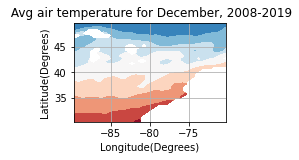

In [13]:
# set up subplot using plt. Just print one contour for average Dec. temps.
fig=plt.subplot(2,2,1)
fig.contourf(ds_regionm['lon'],ds_regionm['lat'],ds_regionm['air'][11,:,:],cmap='RdBu_r')
#ax=plt.gca()
#ax=plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines
fig.grid()

fig.set_xlabel('Longitude(Degrees)')
fig.set_ylabel('Latitude(Degrees)')
plt.title(' Avg air temperature for December, 2008-2019')
#cbar = fig.colorbar(shrink=0.7,orientation='horizontal',
#                   label='Surface Air Temperature (K)')
plt.show()

In [14]:
# put all Decembers of ds_anom into the first 12 elements of its 144 elements
#ds_anom['air'][1,:,:]= ds_anom['air'][12,:,:]

In [15]:
##
# set up loop to find just the December anomalies.
#

# Start setup for anomaly subplots from Dec, 2008 to Dec, 2019
Months=(['12/2008','12/2009','12/2010','12/2011','12/2012','12/2013','12/2014','12/2015','12/2016','12/2017','12/2018','12/2019'])


 i =  0 iindex =  0 months =12/2008
 i =  12 iindex =  1 months =12/2009
 i =  24 iindex =  2 months =12/2010
 i =  36 iindex =  3 months =12/2011
 i =  48 iindex =  4 months =12/2012
 i =  60 iindex =  5 months =12/2013
 i =  72 iindex =  6 months =12/2014
 i =  84 iindex =  7 months =12/2015
 i =  96 iindex =  8 months =12/2016
 i =  108 iindex =  9 months =12/2017
 i =  120 iindex =  10 months =12/2018
 i =  132 iindex =  11 months =12/2019


Text(0.5, 0.98, 'Air Temperature departures from normal for NE U.S')

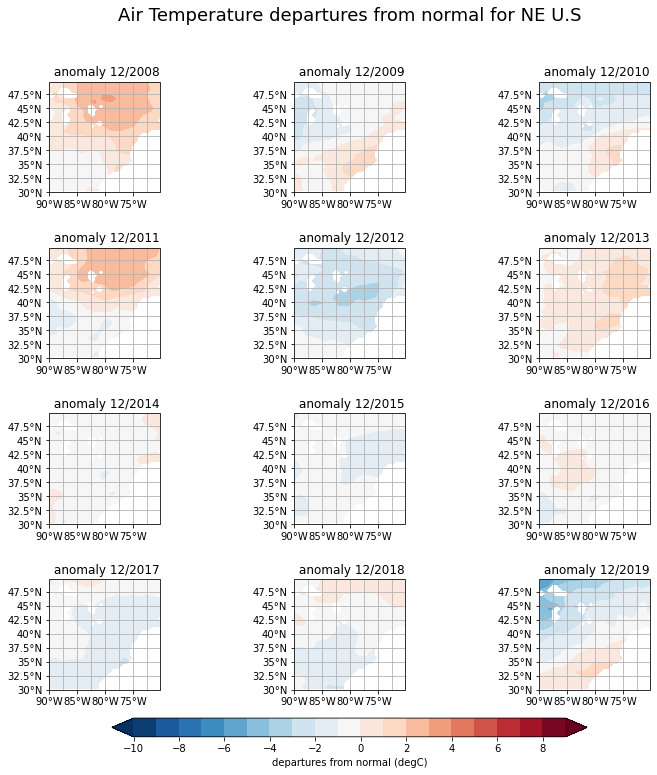

In [16]:
#
# Now do the subplot loops for the anomalous December air temperatures.
#

fig,axs = plt.subplots(nrows= 4, ncols = 3, subplot_kw = {'projection':ccrs.PlateCarree()},
                     figsize = (11,13 ))
axs=axs.flatten()
alevels = np.arange (-10, 10, 1)
iindex = 0
for i,mon in enumerate(ds_anom['time']):
    if (i % 12 == 0):
        plt.title ('anomly' + str(Months[iindex]))
        axs[iindex].gridlines()
        cs= axs[iindex].contourf(ds_anom['lon'],ds_anom['lat'], ds_anom['air'][iindex,:,:],cmap='RdBu_r',
        transform=ccrs.PlateCarree(),extend='both',levels=alevels)

#  longitude labels

        axs[iindex].set_xticks(np.arange(-90,-70, 5),crs=ccrs.PlateCarree())
        lon_formatter=cticker.LongitudeFormatter()
        axs[iindex].xaxis.set_major_formatter(lon_formatter)

# Latitude labels
        
        axs[iindex].set_yticks(np.arange(30,50,2.5),crs=ccrs.PlateCarree())
        lat_formatter=cticker.LatitudeFormatter()
        axs[iindex].yaxis.set_major_formatter(lat_formatter)
#        axs[iindex].set_title('anomaly 12/2008')
        
# Set up title
        moan = Months[iindex]
        axs[iindex].set_title(' anomaly '+ str(Months[iindex])) 
        
#  See what's happening with the indices
        print (' i = ',i, "iindex = ",iindex, 'months ='+ str(Months[iindex]))
        iindex = iindex + 1

#ax=plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines

#axs[1].set_title('anomaly 12/2010')
cbar_ax=fig.add_axes([0.2,0.2,0.6,0.02])
# Make room for colorbar
fig.subplots_adjust(bottom=0.25,top=0.9,left=0.05,right=0.95,
                  wspace=0.1,hspace=0.5)

cbar = plt.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='departures from normal (degC)',)
plt.savefig('colorbar_positioning_03.png', format='png', bbox_inches='tight')
plt.suptitle('Air Temperature departures from normal for NE U.S',fontsize = 18)  